In [1]:
from typing import List
from statistics import quantiles
import pandas as pd
import csv
import os
import statistics
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib import pyplot

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [2]:

import csv
import pandas as pd
data_dict = []

In [3]:
file = f"/mnt/data0/jcxu/acl-tok.csv"

data = pd.read_csv(file) 
# Preview the first 5 lines of the loaded data 
data.head()
for label, content in data.iterrows():
    name = content['Name']
    type = content['Type']
    if 'sent' in type:
        labels =['0','1','2','3','4']
    else:
        labels = ['0','1','2','4','8','16']
    for l in labels:
        data_dict.append({
            'Method':name,
            'Eval': type,
            'n':int(l),
            'Loss':content[l]}
        )
#  r'$d(LM, S_{full})$'



In [4]:
file = f"/mnt/data0/jcxu/acl-sent.csv"

data = pd.read_csv(file) 
# Preview the first 5 lines of the loaded data 
data.head()
for label, content in data.iterrows():
    name = content['Name']
    type = content['Type']
    if 'Sent' in type:
        labels =['0','1','2','3','4']
    else:
        labels = ['0','1','2','4','8','16']
    for l in labels:
        data_dict.append({
            'Method':name,
            'Eval': type,
            'n':int(l),
            'Loss':content[l]}
        )
#  r'$d(LM, S_{full})$'



In [5]:
df = pd.DataFrame.from_dict(data_dict)
df.head()

,Method,Eval,n,Loss
0,Random,DispTok,0,4.61
1,Random,DispTok,1,4.43
2,Random,DispTok,2,4.28
3,Random,DispTok,4,4.11
4,Random,DispTok,8,3.86


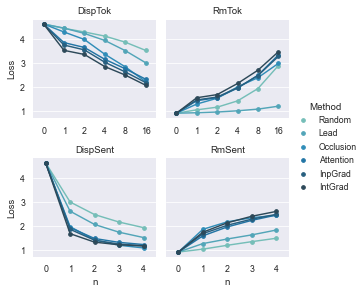

In [24]:

df = pd.DataFrame.from_dict(data_dict)
df.head()
import matplotlib.pyplot as plt
plt.rcParams["legend.loc"] ='lower center'	 
sns.set_theme(style="darkgrid")
sns.set_context("paper", rc={"lines.linewidth": 0.8, "legend.loc": 'best'})

g = sns.catplot(x="n", y="Loss", hue="Method", col="Eval",palette="YlGnBu_d", height=2, aspect=1,kind="point", data=df,
legend=True,legend_out=True,
sharex=False,col_wrap=2)
# plt.legend(bbox_to_anchor=(-0.1, -0.65),ncol=3, borderaxespad=0.)


g.despine(left=True)
g.axes[0].set_title("DispTok")
g.axes[1].set_title("RmTok")
g.axes[2].set_title("DispSent")
g.axes[3].set_title("RmSent")
plt.savefig('bench_eval.pdf', format='pdf', bbox_inches="tight",dpi=500)